# Project: Investigate the Brazil no-show appointment dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#wrangling">General Analysis</a></li>
        <li><a href="#cleaning">Data Cleaning</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#general">General Exploration</a></li>
        <li><a href="#question1">What demographical factors are more useful to understand if a patient would show up for their appointment?</a></li>
        <li><a href="#question2">Which health problems determine whether the patients appear for their scheduled appointments?</a></li>
        <li><a href="#question3">Are demographical variables more important than the health conditions of patients to determine if they would visit their doctors on time?</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This notebook analyzes the medical appointment data showing no-shows in Brazil. This dataset consists of over 100k patient records with various demographic and medical data points. The following are the variables available in the dataset

1. **PatientId** - Identification of a patient
2. **AppointmentID** - Identification of each appointment
3. **Gender** - Male or Female (There are more females than males in the dataset)
4. **ScheduledDay** - The day of the actual appointment
5. **AppointmentDay** - The day the patient registered the appointment
6. **Age** - Age of the patient in years
7. **Neighbourhood** - Where the appointment takes place
8. **Scholarship** - Whether the patient belongs to Brazil's [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) welfare program (1 if yes, 0 if no)
9. **Hipertension** - Whether the patient has hypertension (1 if yes, 0 if no)
10. **Diabetes** - Whether the patient has diabetes (1 if yes, 0 if no)
11. **Alcoholism** - Whether the patient is suffering from alcoholism (1 if yes, 0 if no)
12. **Handcap** - Whether the patient has a disability (1 if yes, 0 if no)
13. **SMS_received** - (1 if at least one message was sent to the patient, 0 otherwise)
14. **No-show** - 'No' if the person was not a no-show (i.e., appeared for the appointment), 'Yes' if the person was a no-show (i.e., did not appear for the appointment)

> Information obtained from the [Kaggle page](https://www.kaggle.com/joniarroba/noshowappointments) for the data source.

> The dependent variable in the dataset is **No-show**, while all the demographical columns and the health issues are the independent variables.
## Questions surrounding the dataset
### 1. What demographical factors are more useful to understand if a patient would show up for their appointment?
> Demographical factors include Gender, Age, Scholarship, and SMS_received.
### 2. Which health problems determine whether the patients appear for their scheduled appointments?
> Health variables include Hipertension (hypertension), Diabetes, Alcoholism, and Handcap (handicapped)
### 3. Are demographical variables more important than the health conditions of patients to determine if they would visit their doctors on time?

In [260]:
# Importing packages and setting up plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, we load in the data, check for any anomalies, and then trim and clean your dataset for analysis.

### General Analysis

We shall now load the CSV file *(noshowappointments-kagglev2-may-2016.csv)* into Python using pandas and read the first few lines to get a sense of the structure of the data.

In [207]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here, we make a few observations.
1. PatientId and AppointmentID are identifiers. They are not really required for our analysis.
2. AppointmentDay and ScheduledDay are dates represented as strings. Moreover, AppointmentDay does not record the time, while ScheduledDay does.
3. The column names are irregular.
4. The 'No-show' field is in a Yes/No format instead of 1 and 0 like the remaining data.

Checking the shape of our data.

In [208]:
df.shape

(110527, 14)

Let us see how we can summarize the data to see if anything appears wrong/invalid.

In [209]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Let us ignore the identifiers as their mean, median, or other statistics do not make sense; they are identifiers and not quantitative variables. We can see some problems with the data:
1. The minimum age is -1, which is wrong. Let us explore this further.
2. The maximum value of handicapped people is 4. It doesn't seem right as this is supposed to be binary according to the data dictionary from the source.

Let us explore the datatypes, null values, and other such information from the dataset.


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Looks like there are no blank fields in the data. However, we need to take care of the invalid values in the age and handicapped columns. We also need to convert the date fields to their appropriate types. It is also a good idea to divide the time into categories (like morning, evening, and so on) for better analysis. Besides, dates might not be a great metric for analysis. A better option would be to get the number of days since the appointment to see if scheduling appointments very early result in a no-show or quick appointments do.

<a id='cleaning'></a>
### Data Cleaning
From the above wrangling, we have made the following conclusions:
1. Need to remove the identifiers for the patients and appointments.
2. Improve column naming.
3. Convert the scheduled day and the appointment day to date format.
4. Store the times from the scheduled day elsewhere and categorize them. Trim the times from both the dates.
5. Find the number of days between the above two dates.
6. Take care of the invalid age and handicap values.
7. Convert the 'No-show' variable to the 1 and 0 format to be consistent with the other variables.

Let us perform this cleaning now.

The patient and the appointment identifiers simply identify a unique patient or appointment respectively. They do not hold any demographic or health information. Thus we discard these columns.

In [211]:
df = df.drop(['PatientId', 'AppointmentID'], axis=1)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let us check if there is any duplicated data in the dataframe and get rid of it.

In [212]:
sum(df.duplicated())

635

In [213]:
df = df.drop_duplicates()

We convert the titles from CamelCase to snake_case.
> Reference: [Elegant Python function to convert CamelCase to snake_case? - Stack Overflow](https://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-snake-case)

In [214]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [215]:
def fix_titles(x):
    return ''.join(['_' + t.lower() if t.isupper() else t for t in x]).lstrip('_')
col_names = df.columns
fixed_col_names = [fix_titles(c) for c in col_names]
fixed_col_names


['gender',
 'scheduled_day',
 'appointment_day',
 'age',
 'neighbourhood',
 'scholarship',
 'hipertension',
 'diabetes',
 'alcoholism',
 'handcap',
 's_m_s_received',
 'no-show']

Some column names still don't look good. Let us change 'hipertension' to 'hypertension', 'handcap' to 'handicap', 's_m_s_received' to 'sms_received' and 'no-show' to 'no_show'.

In [216]:
fixed_col_names[6] = 'hypertension'
fixed_col_names[9] = 'handicap'
fixed_col_names[10] = 'sms_received'
fixed_col_names[11] = 'no_show'
fixed_col_names

['gender',
 'scheduled_day',
 'appointment_day',
 'age',
 'neighbourhood',
 'scholarship',
 'hypertension',
 'diabetes',
 'alcoholism',
 'handicap',
 'sms_received',
 'no_show']

In [217]:
df.columns = fixed_col_names
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let us have a close look at the appointment_day field.

In [218]:
df['appointment_day'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

The appointment_day field does not capture the time at which the appointment is made, while the scheduled_day does. Let us convert both these fields to a common format without considering the time at all in both fields and save the fields as a date object instead of a string. Before that, let us preserve the scheduling time in a seperate field.

In [219]:
# Creating a column scheduled_time to store the time
df['scheduled_time'] = df['scheduled_day'].apply(lambda x: x[11:19])
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_time
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23


In [220]:
only_dates = lambda x: x[:10]
df['scheduled_day'] = df['scheduled_day'].apply(only_dates)
df['appointment_day'] = df['appointment_day'].apply(only_dates)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_time
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23


Now, it is time to convert the date fields to their appropriate data types.

In [221]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

Now, let's create a column for the number of days till the scheduled appointment. This is the difference between the above two dates.

In [222]:
df['days_till_appointment'] = df['appointment_day'] - df['scheduled_day']
df['days_till_appointment'] = df['days_till_appointment'].apply(lambda x: x.days)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_time,days_till_appointment
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,0


Ideally, the number of days till appointment should be 0 or greater than 0. It is impossible to schedule an appointment logically for a date that has passed. Let us see if we get some strange results

In [223]:
df.query('days_till_appointment < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_time,days_till_appointment
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,10:51:53,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,14:50:41,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,13:43:58,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,13:49:20,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,06:50:57,-1


This is surprising. Five patients booked an appointment for a date that has already passed. Obviously, these are no-shows, as it is impossible to attend an appointment that was booked in a past. These look like erroneous entries. Let us get rid of them.

In [224]:
df = df.drop(df.query('days_till_appointment < 0').index)

Let us get rid of the two dates as the difference should be enough for our analysis.

In [225]:
df = df.drop(['scheduled_day', 'appointment_day'], axis=1)

We convert the scheduled_time into categories based on the hour as follows.
- **Morning:** 06:00 to 11:59
- **Afternoon:** 12:00 to 16:59
- **Evening:** 17:00 to 19:59
- **Night:** 20:00 to 05:59
> Reference: [the exact time of "evening" and "night" - English Language Learners Stack Exchange](https://ell.stackexchange.com/questions/8954/the-exact-time-of-evening-and-night)

In [226]:
def get_period_category(x):
    if x.hour >= 6 and x.hour < 12:
        return 'Morning'
    elif x.hour >= 12 and x.hour < 17:
        return 'Afternoon'
    elif x.hour >= 17 and x.hour < 20:
        return 'Evening'
    else:
        return 'Night'

In [227]:
df['scheduled_time'] = pd.to_datetime(df['scheduled_time'])
df['scheduled_time'] = df['scheduled_time'].apply(get_period_category)

Now, we convert the 'no_show' column from text to integers.

In [228]:
df['no_show'] = df['no_show'].apply(lambda x: 1 if x == 'Yes' else 0)

Let us see the rows with invalid age values now.

In [229]:
df.query('age == -1')

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_time,days_till_appointment
99832,F,-1,ROMÃO,0,0,0,0,0,0,0,Morning,0


There is only one such value. Let us remove it and check the shape of the resultant dataframe.

In [230]:
df = df.drop(df.query('age == -1').index)

In [231]:
df.shape

(109886, 12)

Now, we will see the invalid handicap values (more than 1).

In [232]:
df.query('handicap > 1')

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_time,days_till_appointment
946,M,94,BELA VISTA,0,1,1,0,2,1,0,Morning,15
1665,M,64,SANTA MARTHA,0,1,0,1,2,1,0,Morning,30
1666,M,64,SANTA MARTHA,0,1,0,1,2,0,0,Morning,30
2071,M,64,SANTA MARTHA,0,1,0,1,2,0,0,Morning,0
2091,F,11,ANDORINHAS,0,0,0,0,2,0,0,Morning,0
2213,F,29,VILA RUBIM,0,0,0,0,2,0,0,Morning,0
2214,M,55,DO QUADRO,0,0,0,0,3,0,0,Morning,0
2673,M,17,SANTA TEREZA,0,0,0,0,2,1,0,Afternoon,14
5424,M,65,SANTO ANDRÉ,0,1,1,1,2,0,1,Afternoon,2
5467,F,10,BENTO FERREIRA,0,0,0,0,2,0,0,Morning,4


We have a lot of rows (199). Instead of removing them, we assume that the values that are greater than 1 in the handicap column are also people with a handicap. Let us replace these with 1 instead.

In [233]:
df['handicap'] = df['handicap'].apply(lambda x: 1 if x > 1 else x)

The index values must be errant after removal of some rows. Therefore, we reset the index of the dataframe.

In [234]:
df = df.reset_index(drop=True)

We perform a final check on the data.

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109886 entries, 0 to 109885
Data columns (total 12 columns):
gender                   109886 non-null object
age                      109886 non-null int64
neighbourhood            109886 non-null object
scholarship              109886 non-null int64
hypertension             109886 non-null int64
diabetes                 109886 non-null int64
alcoholism               109886 non-null int64
handicap                 109886 non-null int64
sms_received             109886 non-null int64
no_show                  109886 non-null int64
scheduled_time           109886 non-null object
days_till_appointment    109886 non-null int64
dtypes: int64(9), object(3)
memory usage: 10.1+ MB


In [236]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_time,days_till_appointment
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Evening,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Afternoon,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,Afternoon,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Evening,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Afternoon,0


In [237]:
df.nunique()

gender                     2
age                      103
neighbourhood             81
scholarship                2
hypertension               2
diabetes                   2
alcoholism                 2
handicap                   2
sms_received               2
no_show                    2
scheduled_time             4
days_till_appointment    129
dtype: int64

Data seems clean now. Let us proceed to the next stage.

<a id='eda'></a>
## Exploratory Data Analysis

In this section, we shall explore the data and gain insights from it. Initially, we shall perform some general exploration and then move on to answer the specific questions posed in the Introduction.

<a id='general'></a>
### General Exploration

Let us view the summary statistics of the data.

In [238]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_till_appointment
count,109886.000000,109886.000000,109886.000000,109886.000000,109886.000000,109886.000000,109886.000000,109886.000000,109886.000000
mean,37.090021,0.098293,0.197259,0.071829,0.030432,0.020175,0.322898,0.201054,10.158537
std,23.120874,0.297711,0.397931,0.258206,0.171772,0.140601,0.467586,0.400790,15.251627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


We can make interesting observations from the data from the above description.
1. The average age of a patient is 37, which is also the median age.
2. From the mean and the percentiles, we can see that most people are not enrolled in the welfare program. Also, most people don't have the health conditions. It could be helpful to create a variable that considers the total number of health conditions one has.
3. Only about one-third of the people received an SMS for the appointment.
4. Hypertension is the condition that is troubling the people the most.
5. Most people have showed up for their appointments. Only one-fifth of the patients missed their visits.

Let us see how the data looks graphically.

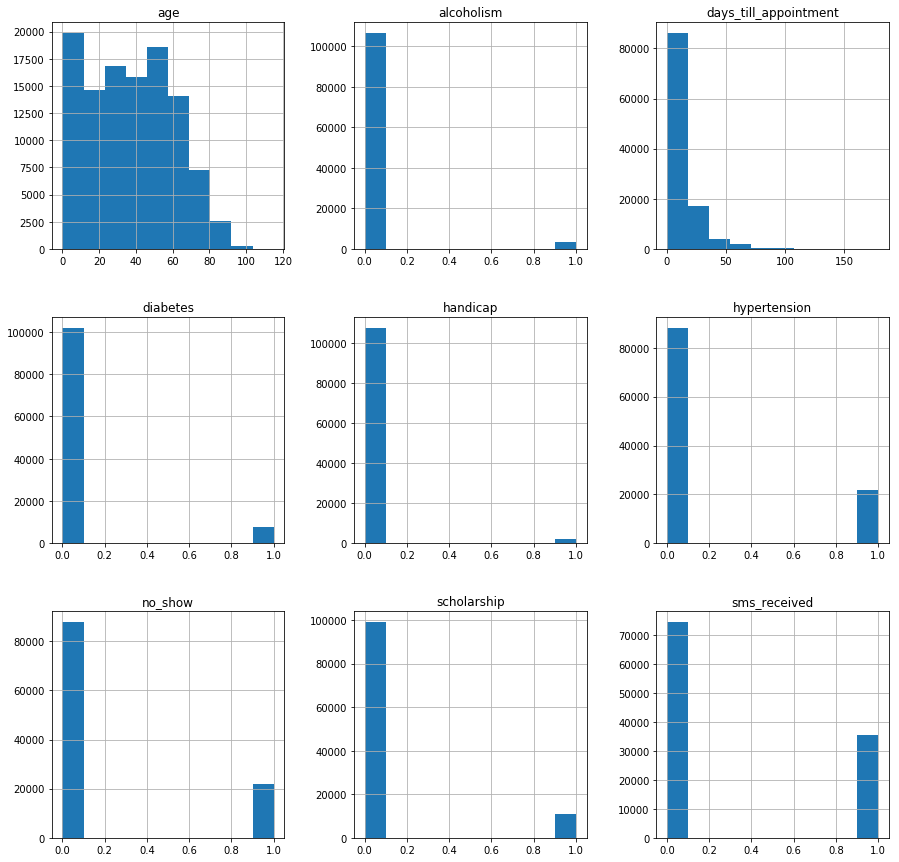

In [239]:
df.hist(figsize=(15, 15));

This mostly matches up with our observations from the summary statistics. We observe some interesting stuff.
1. The age is pretty distributed. This can also be seen by the standard deviation (std) values in the summary statistics.
2. The days until appointment field is right-skewed.

Let us look more into the specific questions.

<a id='question1'></a>
### 1. What demographical factors are more useful to understand if a patient would show up for their appointment?

The demographical factors that we consider from our cleaned dataset are gender, age, neighbourhood, scholarship, sms_received, scheduled_time, and days_till_appointment.

We build a filter for the no-shows and those who showed up for the appointment.

In [240]:
from matplotlib.ticker import PercentFormatter
demographics = ['gender', 'age', 'neighbourhood', 'scholarship', 'sms_received', 'scheduled_time', 'days_till_appointment']

In [241]:
no_shows = df['no_show'] == 1
shows = df['no_show'] == 0

Let us check the summary statistics of each demographical factor with respect to their no-show status.

In [242]:
df.groupby('no_show').describe().transpose().loc[demographics]

no_show                                 0             1
age                   count  87793.000000  22093.000000
                      mean      37.796123     34.284117
                      std       23.349828     21.965041
                      min        0.000000      0.000000
                      25%       18.000000     16.000000
                      50%       38.000000     33.000000
                      75%       56.000000     51.000000
                      max      115.000000    115.000000
days_till_appointment count  87793.000000  22093.000000
                      mean       8.734933     15.815643
                      std       14.547298     16.612351
                      min        0.000000      0.000000
                      25%        0.000000      4.000000
                      50%        2.000000     11.000000
                      75%       12.000000     23.000000
                      max      179.000000    179.000000
scholarship           count  87793.000000  22093.000000
                      mean       0.093914      0.115693
                      std        0.291711      0.319863
                      min        0.000000      0.000000
                      25%        0.000000      0.000000
                      50%        0.000000      0.000000
                      75%        0.000000      0.000000
                      max        1.000000      1.000000
sms_received          count  87793.000000  22093.000000
                      mean       0.292711      0.442855
                      std        0.455010      0.496735
                      min        0.000000      0.000000
                      25%        0.000000      0.000000
                      50%        0.000000      0.000000
                      75%        1.000000      1.000000
                      max        1.000000      1.000000

We observe very interesting and unexpected observations!

1. Slightly younger people didn't show up, but age does not appear to have much of an importance.
2. People who booked earlier tend to not appear for their appointments. The mean, median, and percentiles have significant differences.
3. People who belonged to the welfare program tended to skip visits.
4. Suprisingly, a larger amount of people who received an SMS for their appointments missed them.

Let us visualize this.

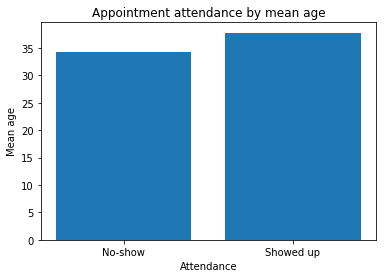

In [243]:
grouped_by_age = df.groupby('no_show').mean()['age']
plt.bar(['Showed up', 'No-show'], grouped_by_age)
plt.title('Appointment attendance by mean age')
plt.xlabel('Attendance')
plt.ylabel('Mean age')
plt.show()

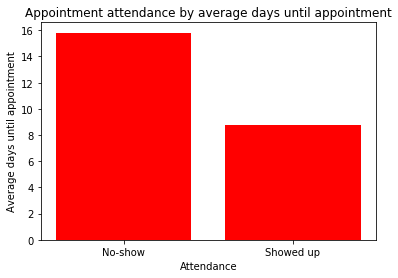

In [244]:
grouped_by_days = df.groupby('no_show').mean()['days_till_appointment']
plt.bar(['Showed up', 'No-show'], grouped_by_days, color='red')
plt.title('Appointment attendance by average days until appointment')
plt.xlabel('Attendance')
plt.ylabel('Average days until appointment')
plt.show()

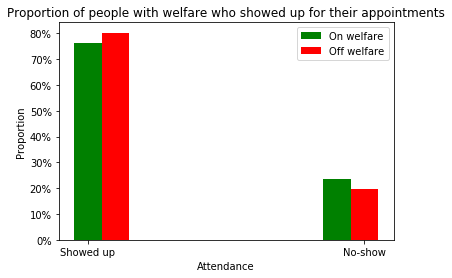

In [245]:
on_welfare = df['no_show'][df['scholarship'] == 1]
off_welfare = df['no_show'][df['scholarship'] == 0]
plt.hist(on_welfare, color='green', weights=np.ones(len(on_welfare)) / len(on_welfare), align='left', label='On welfare')
plt.hist(off_welfare, color='red', weights=np.ones(len(off_welfare)) / len(off_welfare), align='right', label='Off welfare')
plt.xticks([0, 1], ['Showed up', 'No-show'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Proportion of people with welfare who showed up for their appointments')
plt.xlabel('Attendance')
plt.ylabel('Proportion')
plt.legend()
plt.show()

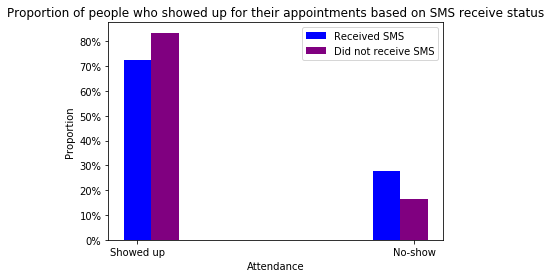

In [246]:
sms_received = df['no_show'][df['sms_received'] == 1]
sms_not_received = df['no_show'][df['sms_received'] == 0]
plt.hist(sms_received, color='blue', weights=np.ones(len(sms_received)) / len(sms_received), align='left', label='Received SMS')
plt.hist(sms_not_received, color='purple', weights=np.ones(len(sms_not_received)) / len(sms_not_received), align='right', label='Did not receive SMS')
plt.xticks([0, 1], ['Showed up', 'No-show'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Proportion of people who showed up for their appointments based on SMS receive status')
plt.xlabel('Attendance')
plt.ylabel('Proportion')
plt.legend()
plt.show()

Let us see how the scheduled time of the day impacts visits.

In [247]:
df.groupby('scheduled_time')['no_show'].describe()

,count,mean,std,min,25%,50%,75%,max
scheduled_time,,,,,,,,
Afternoon,36977.0,0.220948,0.414891,0.0,0.0,0.0,0.0,1.0
Evening,4721.0,0.235543,0.424383,0.0,0.0,0.0,0.0,1.0
Morning,68087.0,0.187716,0.390488,0.0,0.0,0.0,0.0,1.0
Night,101.0,0.297030,0.459229,0.0,0.0,0.0,1.0,1.0


The overwhelming majority of the appointments are scheduled for the morning and afternoon compared  to the evenings, as naturally expected, and a tiny amount of cases are in the night.

The mean and spread does not drastically differ over the times, except for the nights, where the no-shows are the most. This might not be accurate assessment as the amount of appointments are significantly smaller during the period when everyone sleeps.

Let us look into the remaining categorical demographics: gender and neighbourhood.

In [248]:
females = df['gender'] == 'F'
males = df['gender'] == 'M'

In [249]:
no_show_females = df['no_show'][females]
no_show_males = df['no_show'][males]

In [250]:
no_show_females.describe()

count    71413.000000
mean         0.202372
std          0.401771
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: no_show, dtype: float64

In [251]:
no_show_males.describe()

count    38473.000000
mean         0.198607
std          0.398956
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: no_show, dtype: float64

Let us plot the gendered show-up/no-show information.

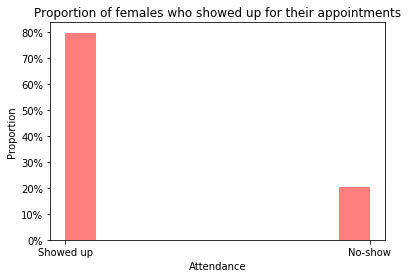

In [252]:
plt.hist(no_show_females, alpha=0.5, color='red', weights=np.ones(len(no_show_females)) / len(no_show_females))
plt.xticks([0, 1], ['Showed up', 'No-show'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Proportion of females who showed up for their appointments')
plt.xlabel('Attendance')
plt.ylabel('Proportion')
plt.show()

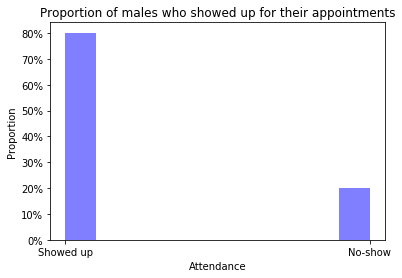

In [253]:
plt.hist(no_show_males, alpha=0.5, color='blue', weights=np.ones(len(no_show_males)) / len(no_show_males))
plt.xticks([0, 1], ['Showed up', 'No-show'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Proportion of males who showed up for their appointments')
plt.xlabel('Attendance')
plt.ylabel('Proportion')
plt.show()

Gender doesn't seem to have much of an impact. We see about 80% of the people have showed up and 20% didn't in both cases.

In [254]:
df.groupby('neighbourhood').describe()['no_show']

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
AEROPORTO,8.0,0.125000,0.353553,0.0,0.0,0.0,0.0,1.0
ANDORINHAS,2194.0,0.226527,0.418679,0.0,0.0,0.0,0.0,1.0
ANTÔNIO HONÓRIO,271.0,0.184502,0.388611,0.0,0.0,0.0,0.0,1.0
ARIOVALDO FAVALESSA,280.0,0.221429,0.415952,0.0,0.0,0.0,0.0,1.0
BARRO VERMELHO,422.0,0.215640,0.411754,0.0,0.0,0.0,0.0,1.0
BELA VISTA,1894.0,0.200634,0.400580,0.0,0.0,0.0,0.0,1.0
BENTO FERREIRA,854.0,0.221311,0.415373,0.0,0.0,0.0,0.0,1.0
BOA VISTA,312.0,0.185897,0.389649,0.0,0.0,0.0,0.0,1.0
BONFIM,2761.0,0.198479,0.398927,0.0,0.0,0.0,0.0,1.0


There are a lot of means here, given that there are 81 localities in the dataset. Let us summarize means and see.

In [255]:
df.groupby('neighbourhood').describe()['no_show']['mean'].describe()

count    81.000000
mean      0.204936
std       0.097248
min       0.000000
25%       0.179185
50%       0.197183
75%       0.217524
max       1.000000
Name: mean, dtype: float64

The spread of the means isn't much either. This variable isn't of much importance.

<a id='question2'></a>
### 2. Which health problems determine whether the patients appear for their scheduled appointments?

The health factors that we consider are hypertension, diabetes, alcoholism, and handicap.

In [256]:
health_conditions = ['hypertension', 'diabetes', 'alcoholism', 'handicap']

Let us check the summary statistics of each health factor with respect to their no-show status.

In [257]:
df.groupby('no_show').describe().transpose().loc[health_conditions]

no_show                        0             1
alcoholism   count  87793.000000  22093.000000
             mean       0.030481      0.030236
             std        0.171907      0.171239
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%        0.000000      0.000000
             max        1.000000      1.000000
diabetes     count  87793.000000  22093.000000
             mean       0.073707      0.064364
             std        0.261296      0.245406
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%        0.000000      0.000000
             max        1.000000      1.000000
handicap     count  87793.000000  22093.000000
             mean       0.020731      0.017969
             std        0.142482      0.132843
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%        0.000000      0.000000
             max        1.000000      1.000000
hypertension count  87793.000000  22093.000000
             mean       0.204435      0.168741
             std        0.403291      0.374532
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%        0.000000      0.000000
             max        1.000000      1.000000

Hypertension only seems to have slightly more impact. The other health factors have similar mean and spread. Let us plot hypertension proportionally and see how the graph looks like.

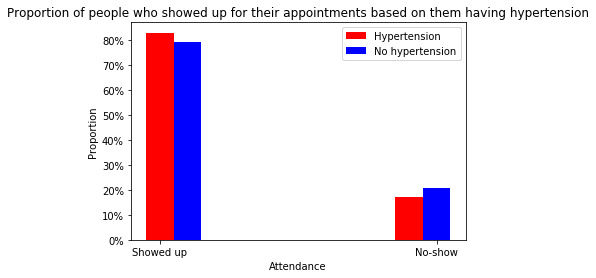

In [258]:
with_hypten = df['no_show'][df['hypertension'] == 1]
without_hypten = df['no_show'][df['hypertension'] == 0]
plt.hist(with_hypten, color='red', weights=np.ones(len(with_hypten)) / len(with_hypten), align='left', label='Hypertension')
plt.hist(without_hypten, color='blue', weights=np.ones(len(without_hypten)) / len(without_hypten), align='right', label='No hypertension')
plt.xticks([0, 1], ['Showed up', 'No-show'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Proportion of people who showed up for their appointments based on them having hypertension')
plt.xlabel('Attendance')
plt.ylabel('Proportion')
plt.legend()
plt.show()

Looks like a slight difference (about 5%).

<a id='question3'></a>
### 3. Are demographical variables more important than the health conditions of patients to determine if they would visit their doctors on time?

* **Demographics that impacted no-shows the most:** Days until appointment, whether the patient received SMS messages for their appointments, and enrollment in welfare.
* **Health factors that impacted no-shows the most:** Hypertension

<a id='conclusions'></a>
## Conclusions

1. The demographics of a patient are far more important in determining whether they would turn up for an appointment than the health problems they have. However, people with hypertension are likely to meet their doctors more than the patients who don't suffer from blood pressure problems.
2. The number of days until appointment is the most valuable indicator. Patients who book appointment for later dates are significantly less likely to go through their appointments.
3. A strange observation that was seen related to SMS messages. People who **did not** receive them were more likely to show up for their appointments than people who did. Normally, we would expect that an SMS would serve as a reminder for attending to an appointment, but here, the case seems to be the opposite.
4. Another interesting observation was that people who were on the Brazilian welfare program, Bolsa Família, were less likely to turn up to their appointments.

**Note:** Most of the analysis above was obtained through the average, quartile values, counts, and standard deviation. We don't employ any advanced techniques such as regression or clustering.

In [261]:
# For saving notebook as HTML
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0